In [1]:
import sympy
import numpy
import scipy
import matplotlib.pyplot as plt
import random

import datetime

import math

import pandas

import control

import scipy.optimize
from tbcontrol.responses import fopdt, sopdt
from ipywidgets import interact

import tclab

Specifications

In [2]:
spans_deltas = 16
init_spans = 2

spans = spans_deltas+init_spans

base_unit = 60*20 #Each span lasts base_unit seconds

q_init = 50
q_final = 50

setpoint = 30

In [3]:
increment = (q_final-q_init)/(spans-1)

run_time = base_unit*spans

In [4]:
str(datetime.timedelta(seconds=run_time))

'6:00:00'

In [5]:
def fopdt_pos(t, K, tau, theta, y0):
    return fopdt(t, K, numpy.exp(tau), theta, y0)

In [7]:
data_frame = pandas.read_csv("long_span_run 20200227 overnight.csv")

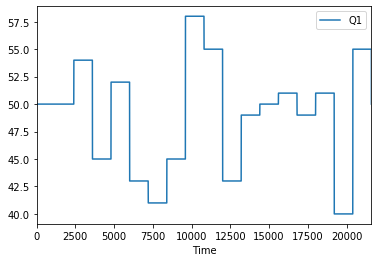

In [40]:
data_frame.plot(x = 'Time', y = 'Q1')

In [8]:
class historian:
    
    def __init__(self, dataframe):
        self.dataframe = dataframe
        
        self.t = self.dataframe.Time
    
    def logdict(self, string):
        return self.dataframe[string]

In [9]:
h = historian(data_frame)

In [11]:
[K, tau, theta, y0], _ = scipy.optimize.curve_fit(fopdt, h.t, h.logdict('T1'), [2, 4, 100, 50]) #h.logdict['T1']

tau = numpy.exp(tau)
[K, tau, theta, y0]

[34.13380625303434,
 7.729620181684259e+57,
 31.418322500459592,
 24.339688019454027]

In [35]:
data_frame["Q1"].iloc[-2]

55.0

[0.7401002847813535, 183.40137011853645, 15.87761411774022, 59.500000087735295] 4.0 2400 3600
[0.6771571014482161, 148.88686680422046, 22.942653757684457, 62.535652146593584] -9.0 3600 4800
[0.5916643386258843, 154.6479418459758, 14.000351955215683, 56.57469130026791] 7.0 4800 6000
[0.6573967337521266, 168.20461037798245, 12.661088007313596, 60.69769243019186] -9.0 6000 7200
[0.6645040913343082, 162.03846969888085, 25.000133476249136, 54.79682677006054] -2.0 7200 8400
[0.6379219340735156, 140.95927196739888, 23.447875377444884, 53.379999937414205] 4.0 8400 9600
[0.6292697724374072, 153.59046739004046, 16.93847352183028, 56.03882386394769] 13.0 9600 10800
[0.648563301276969, 222.64178543668717, -23.453489336316338, 64.2243525098454] -3.0 10800 12000
[0.6387871692897652, 154.0808464315189, 18.58101437364508, 62.10947377607029] -12.0 12000 13200
[0.671186750321011, 148.6820736619597, 23.053221915399927, 54.41625002841621] 6.0 13200 14400
[0.7784749382461926, 647.2826463945062, -101.945441

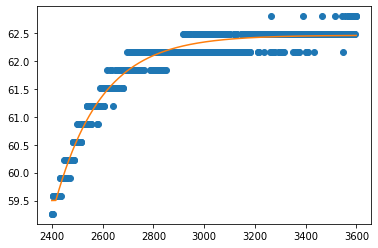

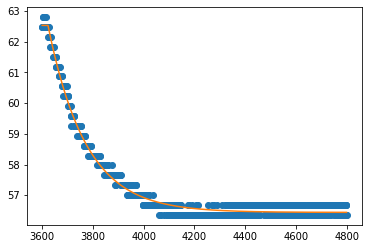

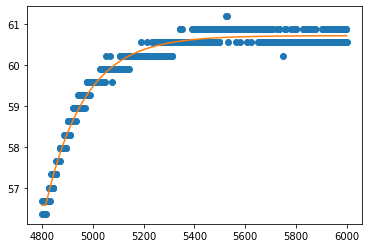

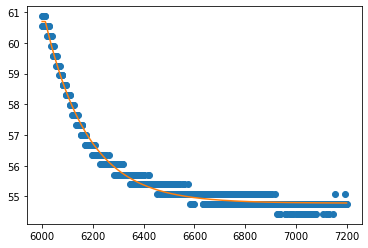

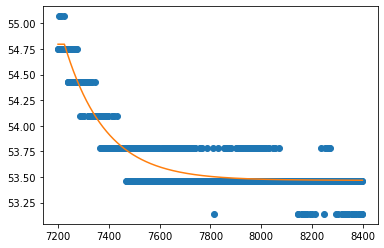

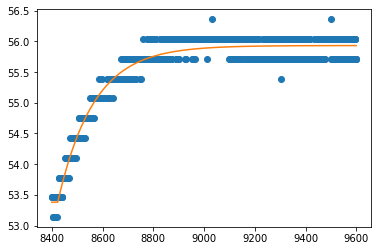

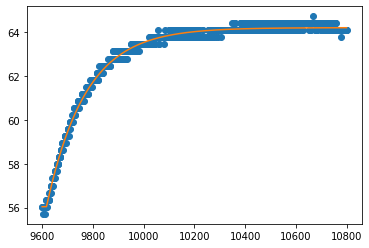

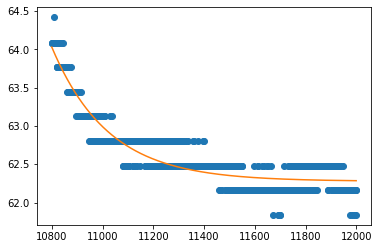

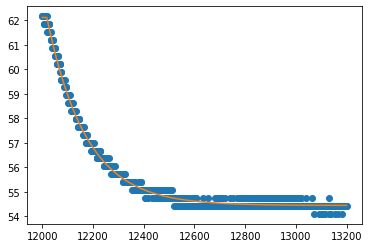

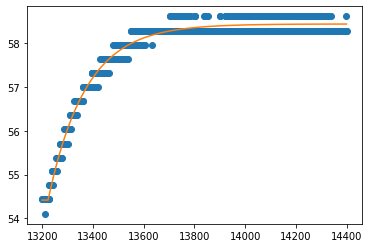

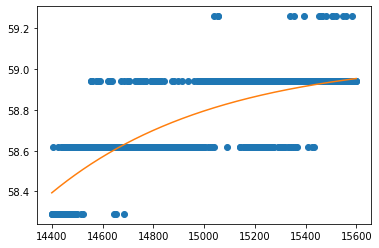

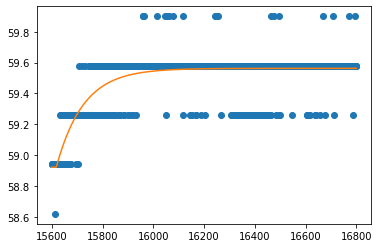

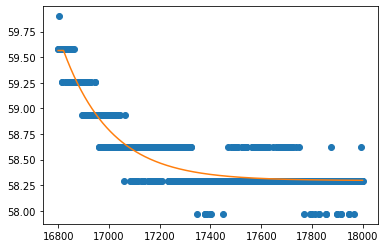

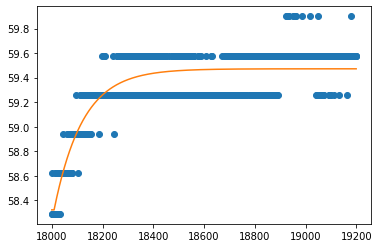

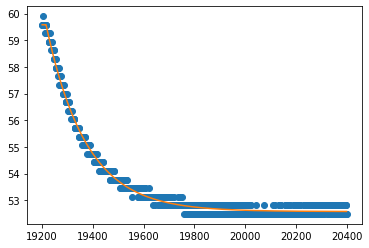

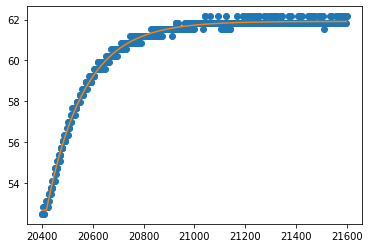

In [41]:
# plt.plot(h.t, h.logdict('T1'))

for span in range(init_spans,spans):
    plt.figure()
    
    lower = span*base_unit
    upper = (span+1)*base_unit
    
    q_change = data_frame['Q1'].iloc[upper-1] - data_frame['Q1'].iloc[lower-2]
    
    [K, tau, theta, y0], _ = scipy.optimize.curve_fit(fopdt_pos, numpy.array(h.t[lower:upper])-h.t[lower], h.logdict('T1')[lower:upper], [2, 5, 20, 50])
    
    tau = numpy.exp(tau)
    
    print([K/q_change, tau, theta, y0], q_change, lower, upper)
#     print( fopdt(numpy.array(h.t[lower:upper])-h.t[lower], K, tau, theta, y0))
    
    plt.plot(h.t[lower:upper], h.logdict('T1')[lower:upper], 'o')
    plt.plot(h.t[lower:upper], fopdt(numpy.array(h.t[lower:upper])-h.t[lower], K, tau, theta, y0))